In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import scienceplots
plt.style.use('science')
plt.rcParams.update({'font.size': 24})

## Import data

In [2]:
# Load CSV file
data = np.genfromtxt('data.csv', delimiter=',',filling_values=np.nan)

# Load data into individual arrays
#time = data[:, 0]
R_l_V6_conversion = data[1:8, 1]
R_l_VHP_conversion = data[1:8, 2]
R_l_VHP_Landau = data[33:71, 2]
R_VHP_Landau = data[33:71, 3]

# define uncertainty
uncertainty = 5 # px

## Define fitting functions

In [3]:
def linear(x, a, b):
    return a*x + b

def r_square_test(x, y, func, popt):
    # Calculates coefficient of determination
    r_squared = 1 - np.sum((y - func(x, *popt))**2) / np.sum((y - np.mean(y))**2)
    return r_squared

## Conversion Plot (Fig. 4)

R^2 =  0.9846679526273391


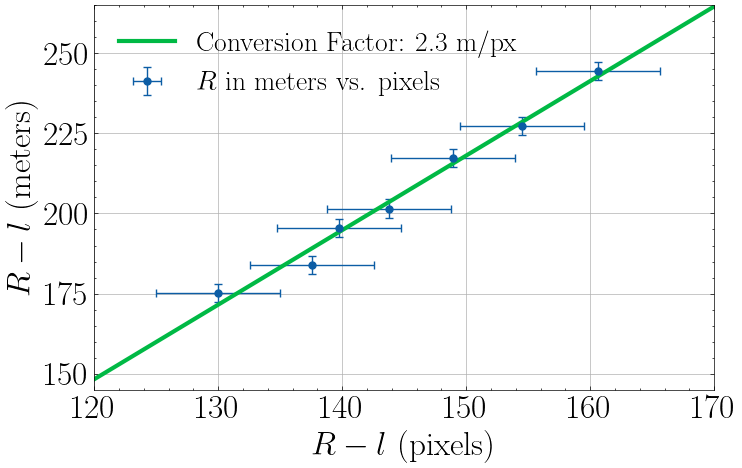

In [4]:
V5_conversion = 0.565 # m/px, Aouad's conversion factor for V5

# Calculate y-axis in meters
y = V5_conversion * R_l_V6_conversion
y_err = np.ones_like(y)*V5_conversion*uncertainty

# Generate arrays for x-axis
x = R_l_VHP_conversion
x_err = np.ones_like(x)*uncertainty

# Fit slope
popt, pcov = curve_fit(linear, x, y, sigma = y_err)

# Save slope as conversion factor for VHP
VHP_conversion = popt[0] # m/px

# Calculate coefficient of determination
r_squared = r_square_test(x, y, linear, popt)
print('R^2 = ', r_squared)

# Generate figure
x_fit = np.linspace(-20, 180, 100)

fig, ax = plt.subplots(figsize=(8, 5))

ax.errorbar(x, y, xerr = x_err, yerr = y_err, marker = 'o', capsize=3, markersize=5, linestyle = 'None', label = r'$R$ in meters vs. pixels')
ax.plot(x_fit, linear(x_fit, *popt), label=f'Conversion Factor: {popt[0]:.1f} m/px', linewidth = 3)

ax.set_xlabel(r'$R-l$ (pixels)')
ax.set_ylabel(r'$R-l$ (meters)')
ax.grid()

ax.set_xlim(120, 170)
ax.set_ylim(145, 265)
ax.legend(fontsize=20)
fig.savefig('ConversionFactor.pdf')
plt.show()

## Landau Plot (Fig. 3)

Error propogation equations are listed here, using $\sigma_R = \sigma_{R-l} = \text{uncertainty}$.

Horizontal error bars: $$\sigma_{\sqrt{\ln R}} = \frac{\sigma_R}{2R \sqrt{\ln R}}.$$

Vertical error bars: $$\sigma_l = \sqrt{\sigma_R^2 + \sigma_{R-l}^2}=\sqrt{2} \text{ uncertainty}.$$

R^2 =  0.9113435413882174


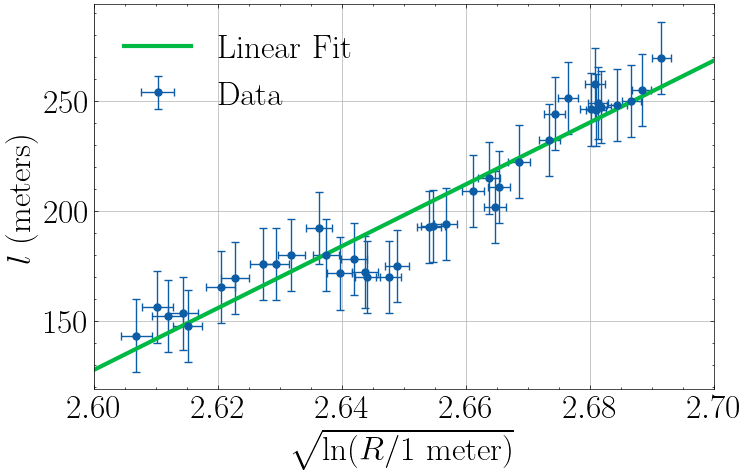

In [5]:
# Generate arrays for x and y-axes.
VHP_l = (R_VHP_Landau-R_l_VHP_Landau)*VHP_conversion
y = VHP_l
y_err = np.ones_like(y)*np.sqrt(2)*uncertainty*VHP_conversion

x = np.sqrt(np.log(R_VHP_Landau*VHP_conversion))
x_err = uncertainty*VHP_conversion / (2*R_VHP_Landau*VHP_conversion * x)

# Fit linear function to data.
popt, pcov = curve_fit(linear, x, y, sigma = y_err)

# Calculate coefficient of determination.
r_squared = r_square_test(x, y, linear, popt)
print('R^2 = ', r_squared)

# Generate figure.
fig, ax = plt.subplots(figsize=(8, 5))
x_fit = np.linspace(2.6, 2.7, 100)

ax.errorbar(x, y, xerr=x_err, yerr=y_err, marker='o', capsize=3, markersize=5, linestyle='None', label='Data')
ax.plot(x_fit, linear(x_fit, *popt), label='Linear Fit', linewidth = 3)
ax.set_xlabel(r'$\sqrt{\ln(R / 1 \text{ meter})}$')
ax.set_ylabel(r'$l$ (meters)')
ax.set_xlim(2.6, 2.7)
ax.grid()

plt.legend()
plt.savefig('Landau.pdf')
plt.show()